Done. You have the matrices PP QQ  RR  SS  WW.
 
PP
(2, 2)
[[0.92  0.   ]
 [0.311 0.   ]]
 
RR
(4, 2)
[[-0.101 -0.   ]
 [-0.412 -0.   ]
 [-0.038 -0.   ]
 [-2.204 -0.   ]]
 
QQ
(2, 2)
[[2.144 1.142]
 [3.779 0.399]]
 
SS
(4, 2)
[[1.721e+01 2.328e+00]
 [1.343e+01 1.929e+00]
 [5.981e-01 8.090e-02]
 [8.577e+01 4.567e+01]]
 
  
Done. You have the matrices "Resp_mat" and "Resp_mat_named" 
which contains impulse reponses to 1% innovations
for all exogenous stochastic processes in the model.
If you want, you can download these into an excel file
or use them to make plots.
   
Resp_mat_named = 
[['Period' '0.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0'
  '10.0' '11.0' '12.0' '13.0' '14.0' '15.0' '16.0' '17.0' '18.0' '19.0'
  '20.0' '21.0' '22.0' '23.0' '24.0' '25.0' '26.0' '27.0' '28.0' '29.0'
  '30.0' '31.0' '32.0' '33.0' '34.0' '35.0' '36.0' '37.0' '38.0' '39.0'
  '40.0' '41.0' '42.0' '43.0' '44.0' '45.0' '46.0' '47.0' '48.0']
 ['capital' '2.144265707397453' '4.01465697910402' '5.6

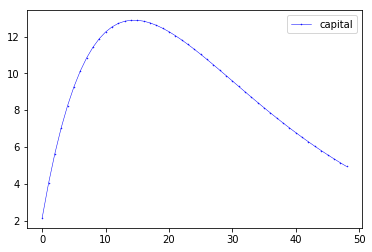

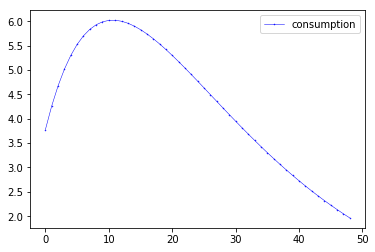

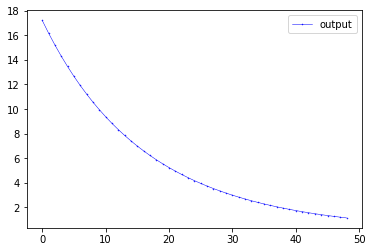

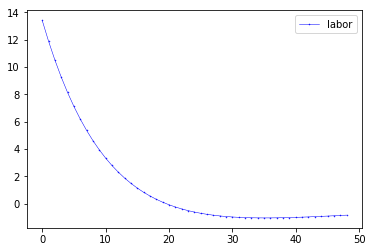

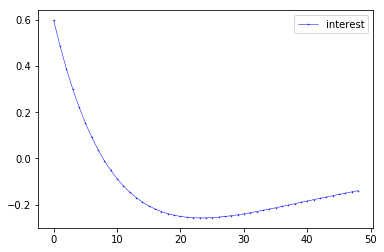

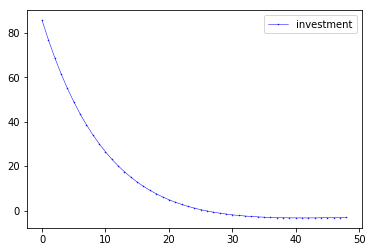

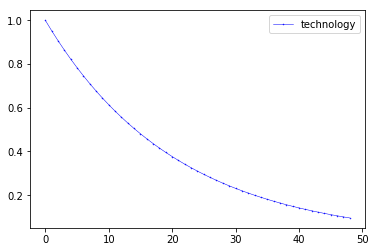

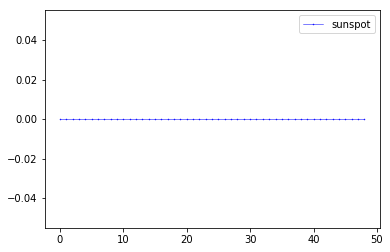

Set of Impulse Responses
x-axis: time periods,  y-axis:  %-deviation from steady state


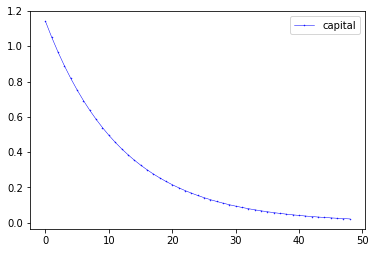

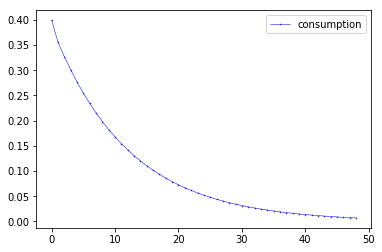

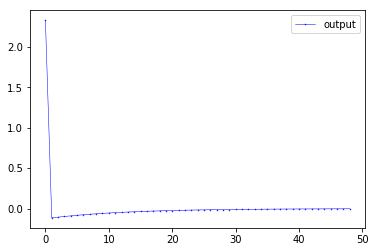

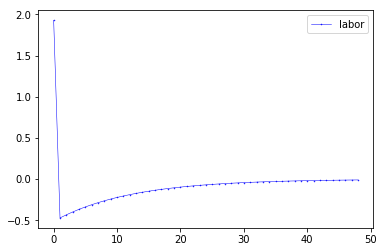

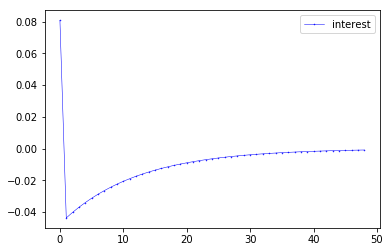

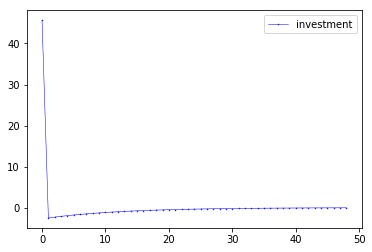

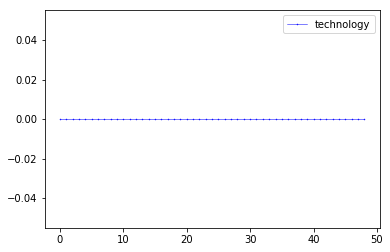

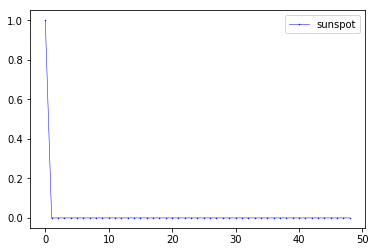

Set of Impulse Responses
x-axis: time periods,  y-axis:  %-deviation from steady state


In [2]:
#   Uhlig's Exampl05.m  Model 3
#   This is  "Economy 3" from Farmer, R.E.A. 
#   and J.T. Guo, "Real Business Cycles and the 
#   Animal Spirits Hypothesis," Journal of Economic 
#  Theory 63, 42-72 (1994).

###  For instructional purposes Uhlig
###  set-up Exampl04.m  Model 3  incorrectly
###  and the model hangs when solved.
###  He shows the correct set-up in Exampl05  
###  by introducing an additional
###  state variable c(t) 

###  NOTE NOTE
### Py and MAT results match for Models 1 and ,
### but not model 3
###  differences in eigenvalues matter in Model 3


import numpy as np


#  These are the parameters for  
#  Farmer-Guo Model 3  

lamb = 0.58
b = 0.70
a = 0.23                
psi =1.0/1.05 
sigma_sigma = 0.001
psi_nu = 0
sigma_nu = 0.217

L_bar = 1.0/3
Z_bar = 1
delta = 0.025
rho = 0.99
eta = 1.0


alpha   = a/lamb
betta   = b/lamb  
R_bar = 1.0/rho
YK_bar = (R_bar + delta - 1)/a
K_bar = (YK_bar / (Z_bar*L_bar**betta) )**(1.0/(alpha-1))
I_bar = delta * K_bar
Y_bar = YK_bar * K_bar
C_bar = Y_bar - delta*K_bar
A_bar = C_bar**(-eta) * b * Y_bar/L_bar # Parameter in utility function


SUNSCALE = 2.0969
        

VARNAMES = ['capital',
                         'consumption',
                         'output',
                         'labor',
                         'interest',
                         'investment',
                         'technology',
                         'sunspot']



AA = np.vstack(([0, -C_bar],
                          [- K_bar, 0],
                          [0, 0],
                          [0, -eta],
                          [0, 0]))

BB = np.vstack(([0, 0],
                          [(1-delta)*K_bar, 0],
                          [alpha, 0],
                          [0, 0],
                          [-a*YK_bar, 0]))

CC = np.vstack(([Y_bar, 0, 0, -I_bar],
                           [0, 0, 0, I_bar],
                           [-1, betta, 0, 0],
                           [1, -1, 0, 0],
                           [a*YK_bar, 0, -R_bar, 0]))

DD = np.vstack(([0,SUNSCALE],
                           [0,0],
                           [1,0],
                           [0,0],
                           [0,0]))

FF = [0, -eta]

GG = [0, eta]

HH = [0, 0]

JJ = [0, 0, 1, 0]

KK = [0, 0, 0, 0]

LL = [0,0]

MM = [0,0]

NN = np.vstack(([psi, 0],
                           [0, psi_nu]))

Sigma = np.vstack(([sigma_sigma**2, 0],
                                [0, sigma_nu**2]))

Sigma_EPS = Sigma


%run uhlig_solver_abreviated.ipynb


print(' ')
print('PP')
print(PP.shape)
print(PP)
print(' ')
print('RR')
print(RR.shape)
print(RR)
print(' ')
print('QQ')
print(QQ.shape)
print(QQ)
print(' ')
print('SS')
print(SS.shape)
print(SS)
print(' ')


%run Uhlig_impulse_resp_all.ipynb

%run Uhlig_plot_impresp_all.ipynb


